Accuracy RandomForestClassifier: 0.7269938650306749
Accuracy DecisionTreeClassifier: 0.7300613496932515


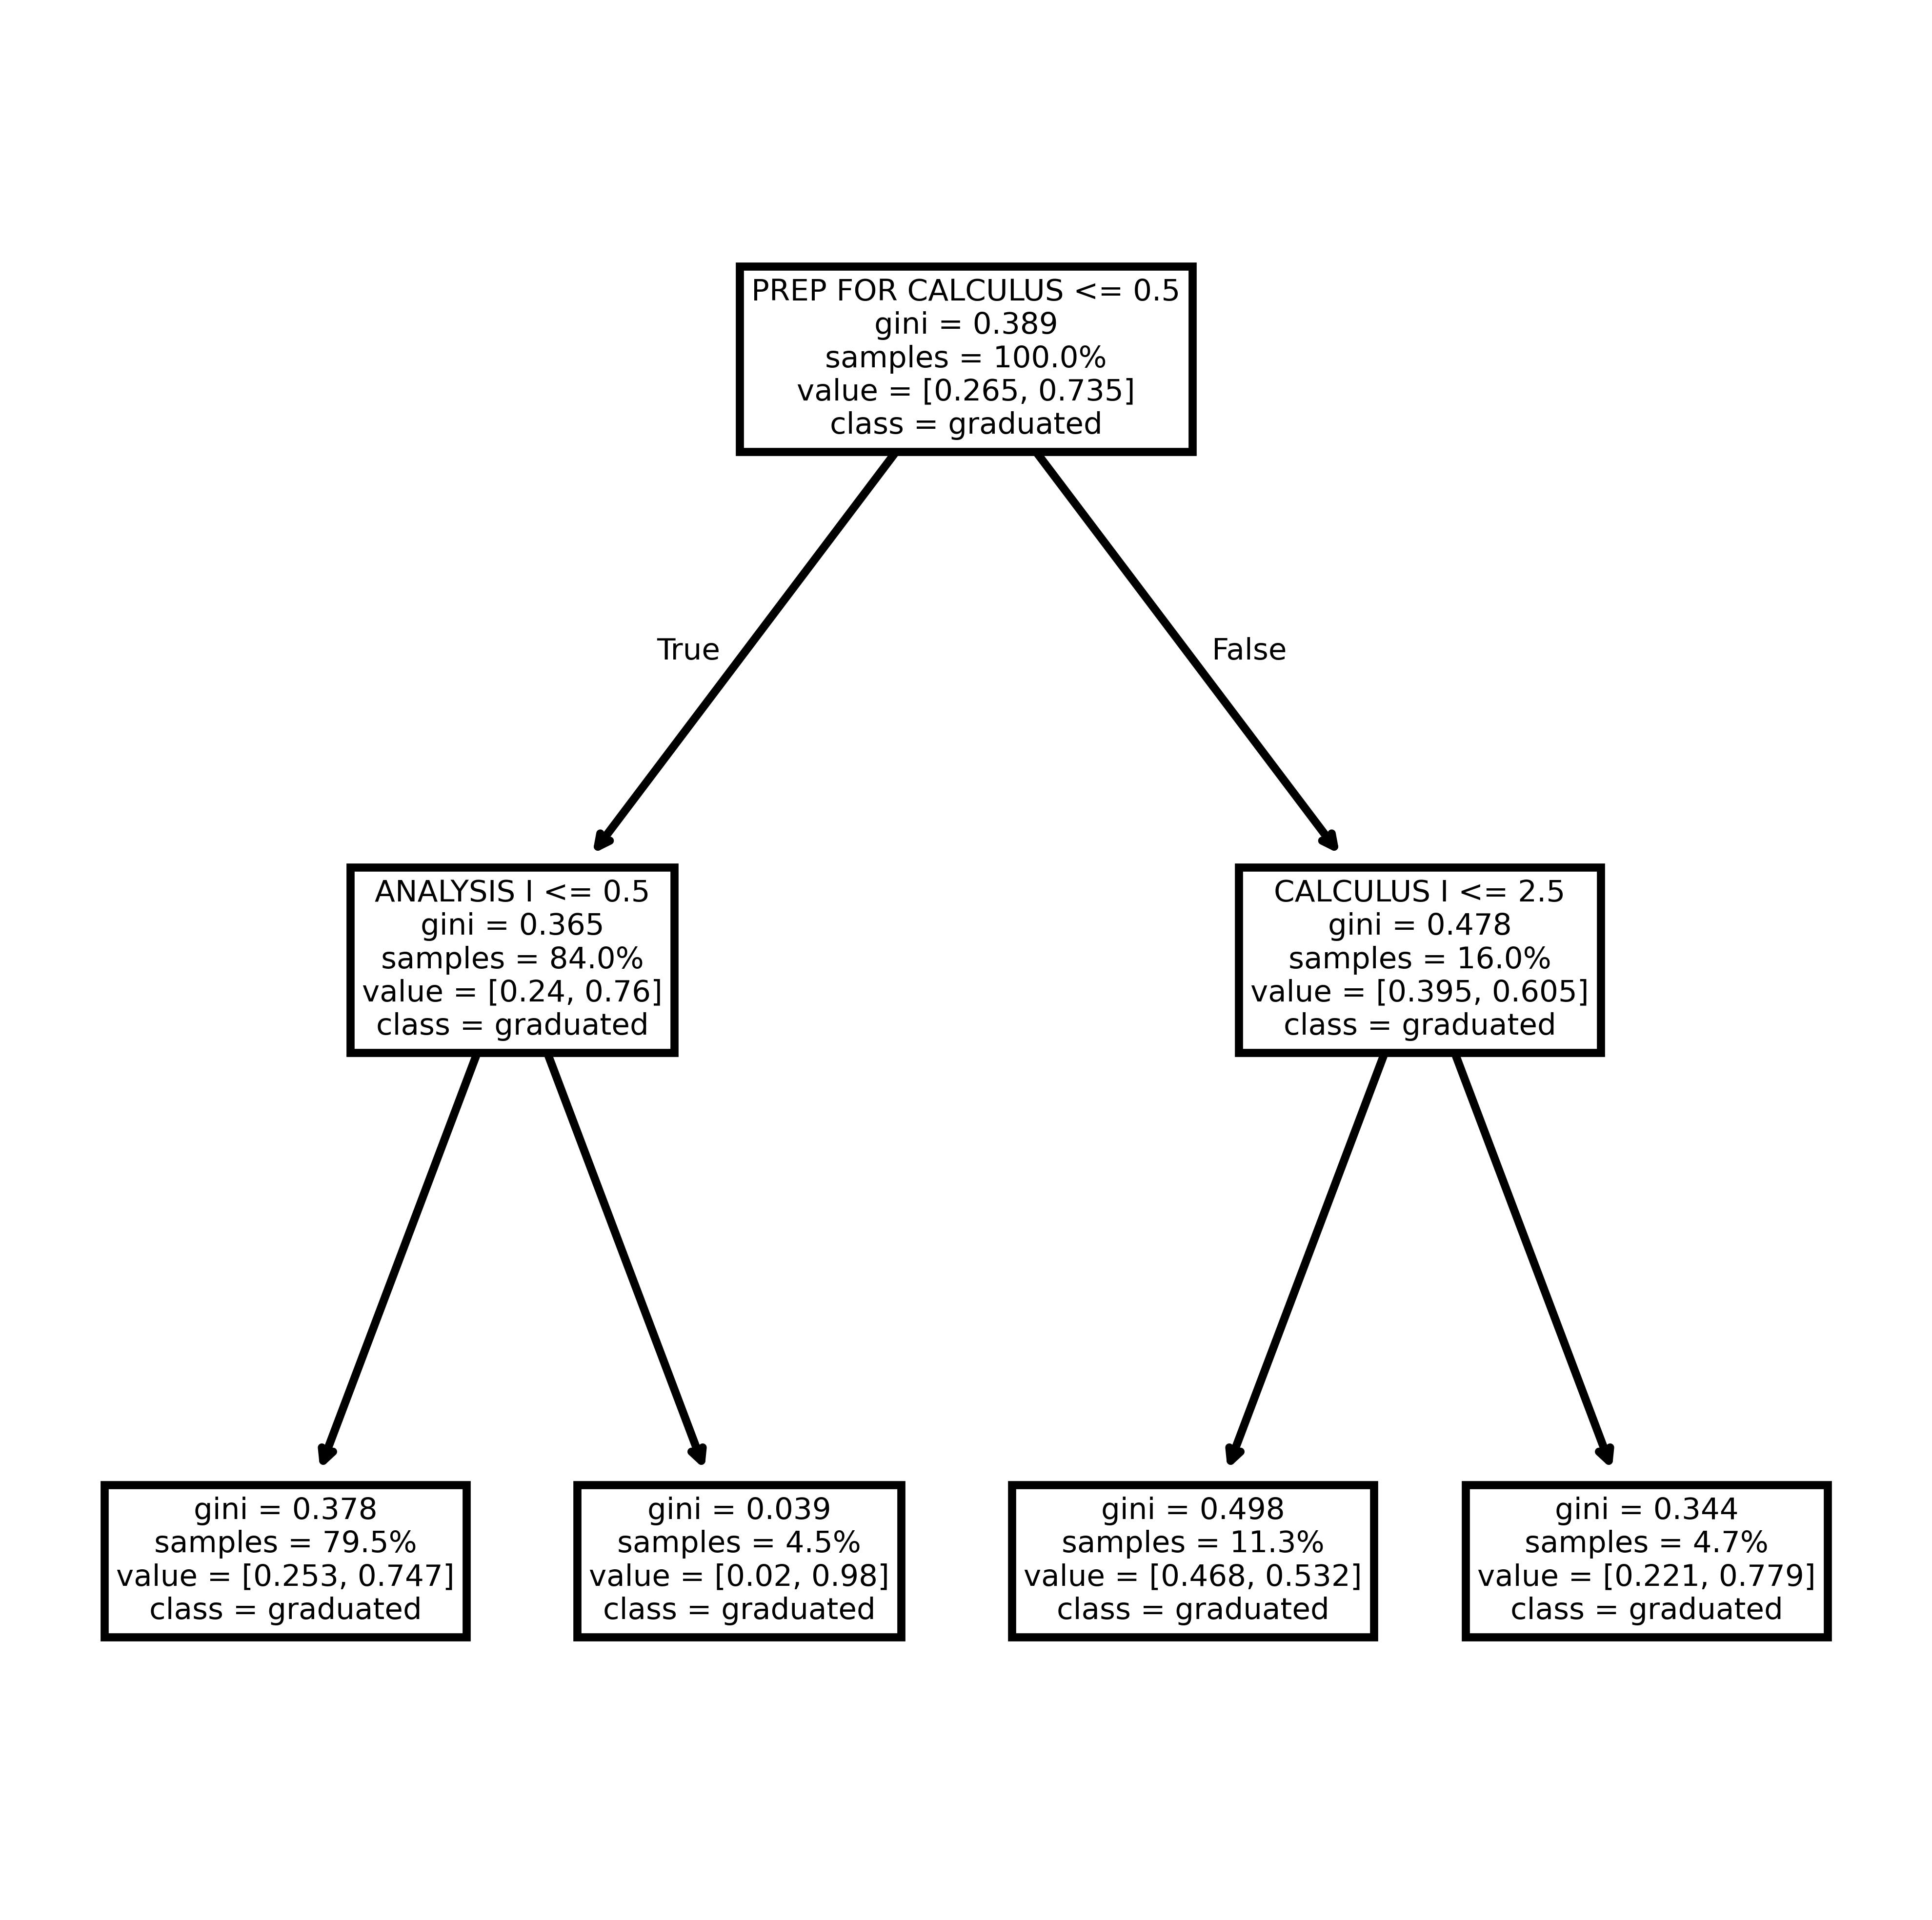

In [68]:
# D Larue, 10/29/24
# Which courses predict graduation

# Data Processing
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# read in cleaned data
grades = pd.read_csv('newdata.csv')

# Split the data into features (X) and target (y)
X = grades.drop(['STUDENT','ENTRY_CCYY','SEM_CCYY.1','DEG_CD','GRAD_TIME'], axis=1)
y = grades['DEG_CD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy RandomForestClassifier:", accuracy)

clf = DecisionTreeClassifier(max_depth = 2, random_state = 0, criterion = 'gini') # gini entropy
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DecisionTreeClassifier:", accuracy)

course_names = grades.columns.tolist()[5:]
cn=['not graduated','graduated']
fn=course_names

""""
fn=['CALCULUS III',
 'CALCULUS II',
 'CALCULUS I',
 'MATRCES&LINEAR ALGB',
 'COLLEGE ALGEBRA',
 'INTRO TO PROBABILTY',
 'INTR PART DIFF EQUA',
 'DIFF EQ & TRANSFMS',
 'THRY LINEAR ALGEBRA',
 'INTRO TO PROOFS',
 'HIGH SCHOOL ALGEBRA',
 'DISC MATH BUS&SOC S',
 'PREP FOR CALCULUS',
 'INTRO TO MATH IDEAS',
 'ORIENTATION IN MATH',
 'ELEM DIFF EQUATNS',
 'INTR SCIENTF CMPTNG',
 'INTR THY PROBAB&S I',
 'INTRO PROBAB&MATRIC',
 'ABSTRACT ALGEBRA I',
 'ANALYSIS I',
 'GEOMETRY I',
 'COMPLEX VARIABLES',
 'GEOMETRY II',
 'UNDERGRAD SEMINAR',
 'SURVEY OF CALCULUS',
 'GRAPH THEORY',
 'UNIV MATH TCH SECDY',
 'SPECIAL TOPICS',
 'ABSTRCT ALGEBRA II',
 'BUS & SOC SCI CALC',
 'NUMBER THEORY',
 'INDEPENDENT STUDY',
 'COMBINATORICS',
 'INVESTM&CREDIT MATH',
 'DISCOVERING MATH',
 'NUMRC MTHDS DIFF EQ',
 'LIFE SCI CALC&MDL I',
 'ANALYSIS II',
 'TEACH SEC SCHL MATH',
 'APPLD TRIGONOMETRY',
 'INTR THY PR&STAT II',
 'TOPOLOGY']
 """

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1200)
plot_tree(clf, feature_names = fn, class_names=cn, proportion=True);
fig.savefig('CoursesPredictGraduation.png')


Added Data/which_courses_predict_graduation.ipynb, which computes and visualizes the resulting RandomForestClassifier/DecisionTreeClassifier. I believe I am formally constructing the tree given our data, from features given as the names of different classes, and class names of not graduated and graduated. The data itself, one line per distinct student, has as input the "grades" each student had in math classes they took (0-3), and as output whether they graduated.

Here is the graphical output, through a depth of 2, with a criterion of "gini". And I am uncertain how to interpret this result.

Here are some of my questions.

1. What is the gini criterion, what role does it play, how is it different than a criterion of entropy?
2. Since the overall graduation rate is 0.734, if one simply always guessed "graduated", one would be right 73.4% of the time. So does an overall accuracy of 0.746 or 0.728 say that these classes tell almost nothing about the chance of graduating?
3. What are the "value" ranges given in the nodes?

etc.
